In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [2]:
df1 = pd.read_csv('./data/sales1.csv', encoding='cp949')
df2 = pd.read_csv('./data/sales2.csv', encoding='cp949')
df3 = pd.read_csv('./data/sales3.csv', encoding='cp949')

In [3]:
df3 = df3.fillna(0)
df3['PAYMENT'] = df3['PAYMENT'].str.strip()

In [4]:
df12_inner = pd.merge(df1, df2, on='ORDERID', how='inner')
df12_left = pd.merge(df1, df2, on='ORDERID', how='left')
df = pd.merge(df12_left, df3, on='ORDERID', how='left')

In [5]:
df001 = pd.DataFrame([['철원', 3], ['혁진', 7]], columns=['name', 'number'])
df002 = pd.DataFrame([['예인', 9], ['솔이', 8]], columns=['name', 'number'])
df003 = pd.concat([df001, df002])
df004 = df003.reset_index()
df005 = pd.concat([df001, df002], ignore_index=True)
df006 = pd.DataFrame([['피아노', '강사'], ['노래', '매니저']], columns=['hobby', 'job'])
df007 = pd.concat([df001, df006], axis=1)
df008 = df[['UNIT_PRICE', 'QUANTITY']]

In [6]:
unit = df[df['UNIT_PRICE']>50]
seoul = df[df['CITY']=='Seoul']
unit_seoul = df[(df['UNIT_PRICE']>50)&(df['CITY']=='Seoul')]

In [7]:
df['PRICE_N_MILEAGE'] = df['TOTAL_PRICE'] + df['MILEAGE']
df.drop('PRICE_N_MILEAGE', axis=1, inplace=True)

In [8]:
df['GRADE'] = ''
for i in range(len(df)):
    total_price = df['TOTAL_PRICE'][i]
    if total_price < 200:
        df.loc[i, 'GRADE'] = 'NORMAL'
    elif 200 <= total_price < 500:
        df.loc[i, 'GRADE'] = 'VIP'
    else:
        df.loc[i, 'GRADE'] = 'VVIP'

In [9]:
now = datetime.datetime.now()
now.strftime('%Y-%m-%d %H:%M:%S')
now-datetime.timedelta(minutes=20)

df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

xmas = datetime.datetime.strptime('2024-12-25', '%Y-%m-%d').date()
df['TO_XMAS'] = (xmas-df['DATE'].dt.date).astype(str).str[:5].astype(int)

In [10]:
df010 = df.sort_values('PURCHASE_TIME', ascending=True)
df011 = df.sort_values('PURCHASE_TIME', ascending=False)

In [11]:
df.groupby('GENDER')['TOTAL_PRICE'].mean(), df.groupby('GENDER', as_index=False)['TOTAL_PRICE'].mean()

(GENDER
 Female    335.095659
 Male      310.789226
 Name: TOTAL_PRICE, dtype: float64,
    GENDER  TOTAL_PRICE
 0  Female   335.095659
 1    Male   310.789226)

In [12]:
table1 = pd.crosstab(df['GENDER'], df['CITY'])
table2 = pd.crosstab(df['GENDER'], df['CITY'], normalize='index')
table3 = pd.crosstab(df['GENDER'], df['CITY'], normalize='columns')
table4 = pd.crosstab(df['GENDER'], df['CITY'], margins=True)
table5 = pd.crosstab(df['GENDER'], df['CITY'], normalize='all')

In [13]:
pivot1 = df.pivot_table(index='GENDER', columns='CITY', values='TOTAL_PRICE', aggfunc='sum')
pivot2 = df.pivot_table(index='GENDER', columns='CITY', values='TOTAL_PRICE', aggfunc='mean')
pivot3 = df.pivot_table(index='GENDER', columns='CITY', values='TOTAL_PRICE', aggfunc='median')

In [14]:
df = pd.DataFrame([
    [42, 'male', 12, 'reading', 1],
    [35, 'female', 3, 'cooking', 0],
    [27, 'female', 7, 'cycling', 2],
    [56, 'male', 21, 'swimming', 0]
], columns=['age', 'gender', 'month_birth', 'hobby', 'target'])

df_oh = pd.get_dummies(df, dtype=float)
# pd.get_dummies(df['hobby'], dtype=float)

In [15]:
df = pd.read_csv('./data/sales.csv', encoding='cp949')

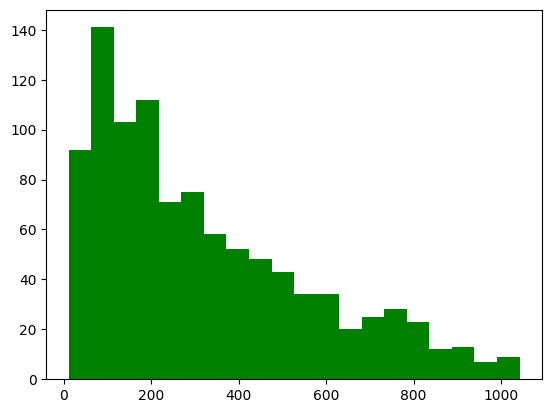

In [16]:
plt.hist(df['TOTAL_PRICE'], color='green', bins=20)
plt.show()

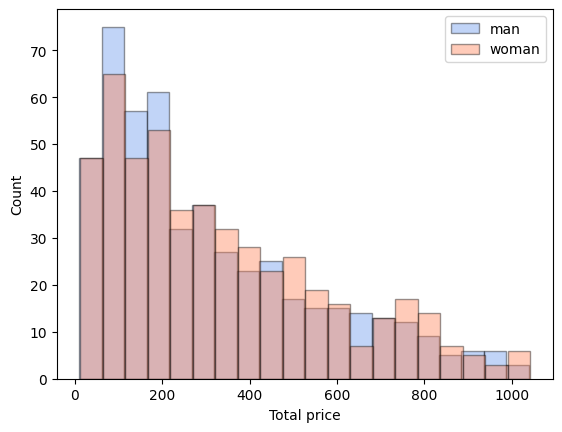

In [17]:
man_price = df[df['GENDER']=='Male']['TOTAL_PRICE']
woman_price = df[df['GENDER']=='Female']['TOTAL_PRICE']

plt.hist(man_price, bins=20, color='cornflowerblue', alpha=0.4, edgecolor='black', linewidth=1, label='man')
plt.hist(woman_price, bins=20, color='coral', alpha=0.4, edgecolor='black', linewidth=1, label='woman')
plt.xlabel('Total price');plt.ylabel('Count');plt.legend();plt.show()

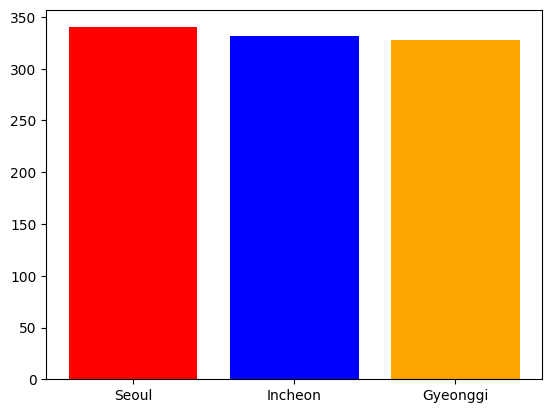

In [18]:
category_counts = df['CITY'].value_counts()
plt.bar(x=category_counts.index, height=category_counts, color=['red', 'blue', 'orange']);plt.show()

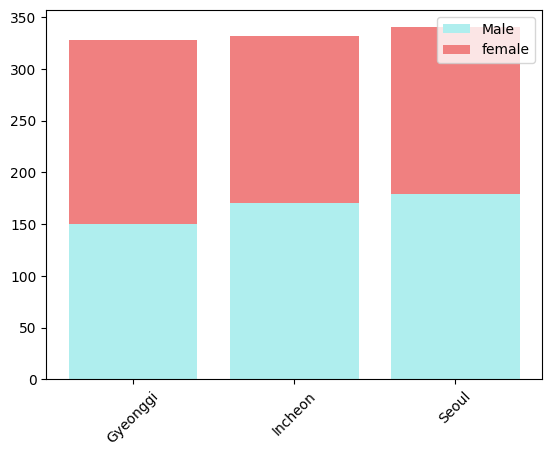

In [19]:
city_gender = pd.crosstab(df['CITY'], df['GENDER'])

plt.bar(x=city_gender.index, height=city_gender['Male'], color='paleturquoise', label='Male')
plt.bar(x=city_gender.index, height=city_gender['Female'], color='lightcoral', label='female', bottom=city_gender['Male'])
plt.xticks(rotation=45);plt.legend();plt.show()

In [20]:
city_price = df.groupby('CITY')['TOTAL_PRICE'].mean()

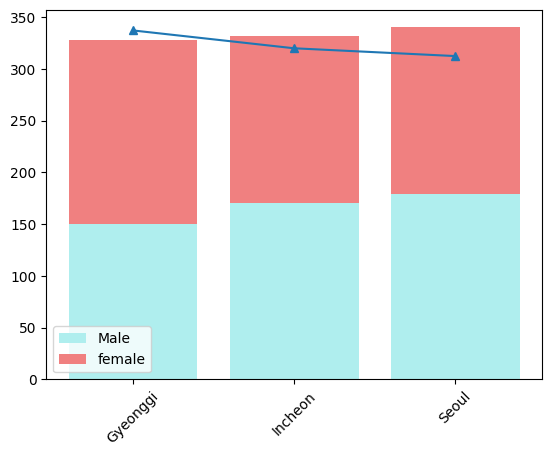

In [21]:
plt.bar(x=city_gender.index, height=city_gender['Male'], color='paleturquoise', label='Male')
plt.bar(x=city_gender.index, height=city_gender['Female'], color='lightcoral', label='female', bottom=city_gender['Male'])
plt.plot(city_gender.index, city_price, '^-')
plt.xticks(rotation=45);plt.legend();plt.show()

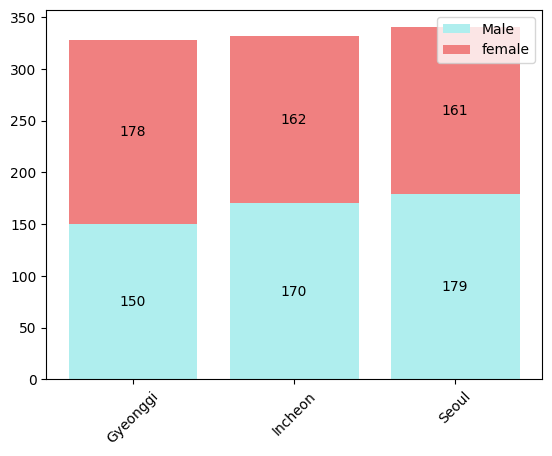

In [22]:
fig, ax = plt.subplots()
bar1 = plt.bar(x=city_gender.index, height=city_gender['Male'], color='paleturquoise', label='Male')
bar2 = plt.bar(x=city_gender.index, height=city_gender['Female'], color='lightcoral', label='female', bottom=city_gender['Male'])
ax.bar_label(bar1, label_type='center')
ax.bar_label(bar2, label_type='center')
plt.xticks(rotation=45);plt.legend();plt.show()

In [23]:
city_gender2 = pd.crosstab(df['CITY'], df['GENDER'], normalize='index')
city_gender2 = city_gender2.round(decimals=3)*100

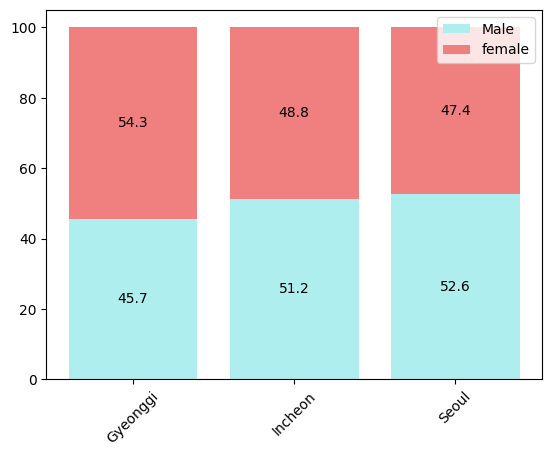

In [24]:
fig, ax = plt.subplots()
bar1 = plt.bar(city_gender2.index, city_gender2['Male'], color='paleturquoise', label='Male')
bar2 = plt.bar(city_gender2.index, city_gender2['Female'], color='lightcoral', label='female', bottom=city_gender2['Male'])
ax.bar_label(bar1, label_type='center')
ax.bar_label(bar2, label_type='center')
plt.xticks(rotation=45);plt.legend();plt.show()

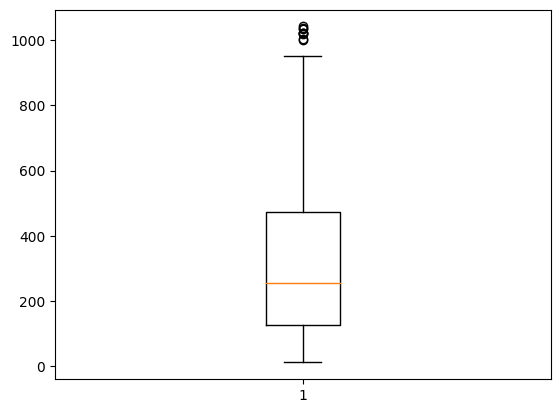

In [25]:
plt.boxplot(df['TOTAL_PRICE']);plt.show()

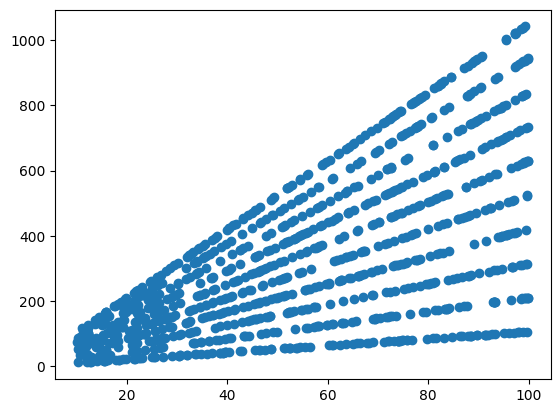

In [26]:
plt.scatter(df['UNIT_PRICE'], df['TOTAL_PRICE']);plt.show()

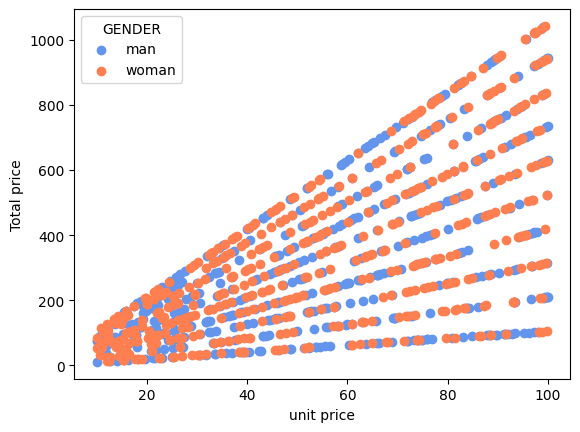

In [27]:
man = df[df['GENDER']=='Male']
woman = df[df['GENDER']=='Female']

plt.scatter(man['UNIT_PRICE'], man['TOTAL_PRICE'], color='cornflowerblue', label='man')
plt.scatter(woman['UNIT_PRICE'], woman['TOTAL_PRICE'], color='coral', label='woman')
plt.legend(title='GENDER');plt.xlabel('unit price');plt.ylabel('Total price');plt.show()

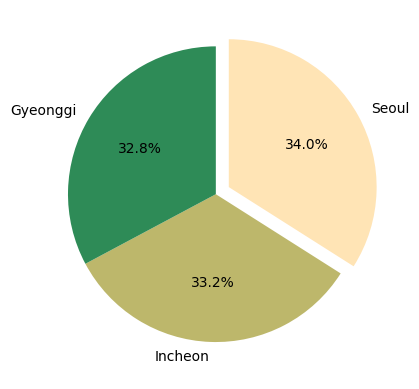

In [28]:
plt.pie(x=category_counts, labels=category_counts.index, startangle=90, counterclock=False, autopct='%.1f%%', explode=[0.1, 0, 0], colors=['moccasin', 'darkkhaki', 'seagreen']);plt.show()

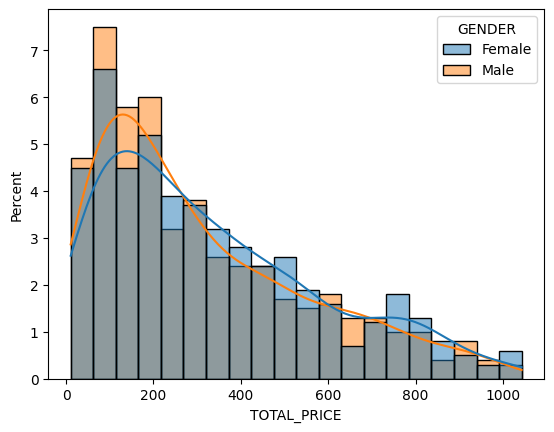

In [29]:
sns.histplot(data=df, x='TOTAL_PRICE', hue='GENDER', stat='percent', bins=20, kde=True);plt.show()

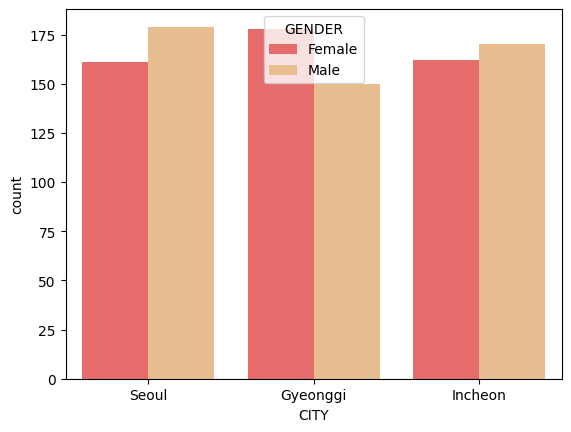

In [30]:
sns.countplot(data=df, x='CITY', hue='GENDER', palette=sns.color_palette(['#FA5858', '#F7BE81', '#81F7BE']));plt.show()

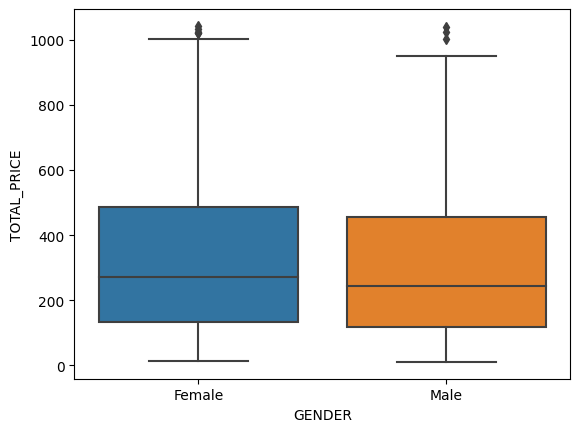

In [31]:
sns.boxplot(data=df, x='GENDER', y='TOTAL_PRICE');plt.show()

[]

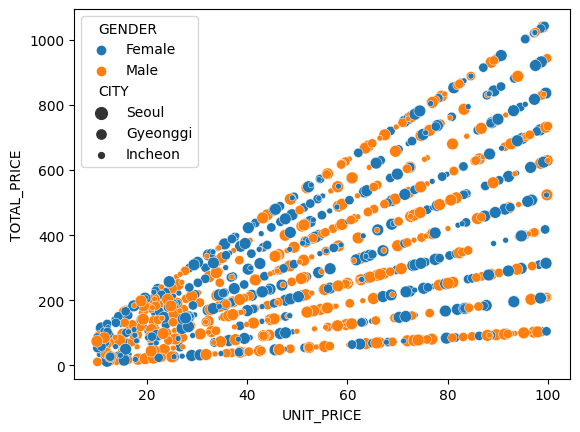

In [32]:
sns.scatterplot(data=df, x='UNIT_PRICE', y='TOTAL_PRICE', hue='GENDER', size='CITY');plt.plot()

In [40]:
fig = px.histogram(data_frame=df, x='TOTAL_PRICE', color='GENDER', title='TOTAL PRICE GENDER')
fig.update_layout(barmode='overlay', width=600, height=400)
fig.show()

In [45]:
fig = px.box(data_frame=df, x='GENDER', y='TOTAL_PRICE', color='GENDER')
fig.show()

In [48]:
fig = px.box(data_frame=df, x='TOTAL_PRICE', y='GENDER', color='GENDER')
fig.show()

In [51]:
fig = px.scatter(data_frame=df, x='UNIT_PRICE', y='TOTAL_PRICE', color='CITY', symbol='GENDER')
fig.show()

In [55]:
category_counts = df['CITY'].value_counts().reset_index()
category_counts.columns = ['city', 'freq']

In [61]:
fig = px.pie(data_frame=category_counts, names='city', values='freq')
fig.update_traces(hole=.3, pull=[.1, 0, 0])
fig.update_layout(width=600, height=500)
fig.show()